In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading in files
aff = pd.read_csv('affiliations_data.csv', sep = ';')
jus = pd.read_csv('justification_data.csv', sep = ';')
dis = pd.read_csv('disease_data.csv', sep = ';')
#do I use the separate dis pd?

In [3]:
#filling in nan values with 0's for easier handling
aff = aff.fillna(0)
dis = dis.fillna(0)
#do I use the separate dis pd?

In [4]:
#removing id columns for increased readability
aff.drop(["list of 2012 ids", "list of 2021 ids"], axis = 1, inplace = True)

## Affiliations

sorted dataframe by counter

stacked barchart of number of categories per category


In [5]:
count_list = []
for index in range(len(aff)):
    count_list.append(aff.iloc[index, 0] + aff.iloc[index, 1]) 

aff['Total count'] = count_list

#change column to sort by 2012 or 2021 exclusively
sort_aff = aff.sort_values(by=['Total count'], ascending = False)

sort_aff.head(10)

,Counter 2012,Counter 2021,Type,Country,Name,Total count
49,3.0,13.0,gov,China,"NSFC, National Natural Science Foundation of C...",16.0
206,7.0,7.0,gov,USA,NIH,14.0
235,3.0,3.0,uni,USA,University of North Carolina at Chapel Hill,6.0
46,0.0,5.0,gov,China,National Key Research and Development Program ...,5.0
236,4.0,1.0,uni,USA,University of Pennsylvania,5.0
58,2.0,3.0,uni,China,"Shanghai Jiao Tong University, China",5.0
209,2.0,3.0,gov,USA,NSF,5.0
29,0.0,5.0,uni,China,Chinese Academy of Sciences,5.0
197,2.0,3.0,uni,USA,Johns Hopkins University,5.0
84,1.0,3.0,gov,EU,European Commission,4.0


In [6]:
#dictionary with country as key and categories as list items in value

def create_country_cat(df):
    dic = {}
    for index in range(len(df)):
        country = df.iloc[index, 3]
        category = df.iloc[index, 2]
        if country not in dic:         
            dic[country] = [category] #add new empty list if country not in dic
        else: 
            dic[country].append(category)
    return dic


In [10]:
#[gov, uni, hosp, corp]
def count_country_cat(dic):
    count_dic = {}
    for key in dic.keys():
        count_list = [0,0,0,0]
        for category in dic.get(key):
            if category == 'gov':
                count_list[0]+=1
            elif category == 'uni':
                count_list[1]+=1
            elif category == 'hosp':
                count_list[2]+=1
            elif category == 'corp':
                count_list[3]+=1
            #making them percentages instead
            total = sum(count_list)
            #if total != 0:
               # count_list[0] = count_list[0]/total*100
               # count_list[1] = count_list[1]/total*100
               # count_list[2] = count_list[2]/total*100
               # count_list[3] = count_list[3]/total*100
            
        count_dic[key] = count_list
    return count_dic

In [11]:
country_category = count_country_cat(create_country_cat(aff))
df = pd.DataFrame.from_dict(country_category)
row_names = {0:'Government', 1:'University', 2:'Hospital', 3: 'Corporation'}
df.rename(index= row_names, inplace=True)
df = df.transpose()



In [12]:
#this is not right - fix code!
df

,Government,University,Hospital,Corporation
Australia,0,3,0,0
Austria,1,1,1,0
Belgium,1,1,1,1
Canada,1,4,2,2
China,12,31,5,13
Colombia,0,1,0,0
Denmark,0,2,0,0
EU,1,0,0,0
France,0,5,1,2
Germany,2,11,3,4


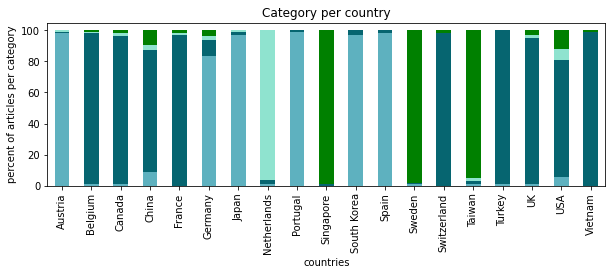

In [306]:

color_dic = {'Government': '#5eb1bf', 'University': '#066570', 'Hospital': '#8FE3CF', 
             'Corporation': 'green'}

fig = df.plot(kind = 'bar', title = 'Category per country', stacked = True, color = color_dic, figsize=(10,3), legend = False )

fig.set_ylabel("percent of articles per category")
#can I alter the x-ticks to be 25, 50 and 100?
#also some form of sorting would be really good

fig.set_xlabel("countries")


plt.savefig('category per country', bbox_inches='tight')

This works, but is basically unreadable.. Everything is too squished together. So need a better representation!

Making the plot larger helped, but still a lot of blank space!
Can I normalise by number of articles - that would probably help

Hvis det nu var hvert lands fordeling i % i stedet for faktiske tal? Lidt bedre, men fordelingen 
er bare virkelig skæv, så det er stadig ulæseligt...
Selv hvis jeg fjerner alle dem der kun har 1 category



## Justification

In [241]:
def count_cat(df, year):
    df = df[df['year'] == year]
    dic = {}
    option_list= []
    for element in df.iloc[:, 1]:
        if "," in element:
            multiples = element.split(", ")
            for option in multiples:
                option_list.append(option)
        else:
            option_list.append(element)
    for option in option_list:
        if option not in dic:
            dic[option] = 1
        else:
            dic[option] = dic.get(option) + 1 
    return dic

In [253]:
cat2012 = count_cat(jus, 2012)
cat2021 = count_cat(jus, 2021)

In [249]:
cat2012

{'sci': 23, 'dis': 11, 'nov': 9}

In [250]:
cat2021

{'sci': 55, 'dis': 26, 'nov': 17, 'hc': 22}

## Disease type/task/body part

In [155]:
def count_column(df, column):
    dic = {}
    option_list= []
    for element in df.iloc[:, column]:
        if element != 0:
            option_list.append(element)
    for option in option_list:
        if option not in dic:
            dic[option] = 1
        else:
            dic[option] = dic.get(option) + 1 
    return dic

In [231]:
def option_per_zhou(df, year):
    df = df[df['year'] == year]
    zhou = count_column(df, 3)
    
    for key in zhou.keys():
        counter = zhou.get(key)
        cat = df[df['Zhou category'] == key]
        dis = count_column(cat, 1)
        task = count_column(cat, 4)
        res = dis | task #merging the two dictionaries
        zhou[key] = res
        zhou.get(key)['counter'] = counter
        
    return zhou


In [232]:
distribution2012 = option_per_zhou(dis, 2012)
distribution2021 = option_per_zhou(dis, 2021)

In [233]:
distribution2012

{'all': {'surgery': 1,
  'detect regional differences in images for different diseases': 1,
  'surgery robotic': 1,
  'counter': 3},
 'eyes': {'glaucoma ': 1,
  'location of foveola for different diseases': 1,
  'counter': 2},
 'chest': {'cancer': 2, 'tuberculosis': 1, 'counter': 3},
 'neuro': {'alzheimers': 3,
  'cancer': 1,
  'mild cognitive impairment': 1,
  'autism': 2,
  'multiple sclerosis': 1,
  "parkinson's disease": 2,
  'measuring nerve fibers': 1,
  'population based pattern recognition brain in particular': 1,
  'neonate brain mapping': 1,
  'different applications': 1,
  'counter': 14},
 'microscopy': {'cancer': 2,
  'metabolic response of cells': 1,
  'cell death event detection': 1,
  'cell feature analysis': 1,
  'cell detection': 1,
  'vesicle fusion/undocking': 1,
  'phase contrast microscopy': 1,
  'counter': 8},
 'abdomen': {'cancer': 2, 'verebral body fractures': 1, 'counter': 3},
 'cardiovascular': {'coronary artery disease': 2,
  'capturing morphological changes 

In [234]:
distribution2021

{'eyes': {'gender prediction': 1,
  'managing imbalanced datasets': 1,
  'fixing overfitting models': 1,
  'imbalanced datasets': 1,
  'unsupervised anomoly detection': 1,
  'counter': 5},
 'neuro': {'alzheimers': 4,
  'bipolar': 1,
  'schizophrenia': 1,
  'intercranial hemorrhage': 1,
  'cancer': 4,
  'autism': 1,
  "parkinson's disease": 1,
  'brain disease': 1,
  'neurodegenerative disorders': 1,
  'Subjective cognitive decline': 1,
  'mild cognitive impairment': 1,
  'major depression disorder': 1,
  'brain midline delineation': 1,
  'harmonization of medical data': 1,
  'data labelling': 1,
  'counter': 21},
 'abdomen': {'cancer': 10,
  'liver steatosis': 1,
  "crohn's disease": 1,
  'lumbar degeneration disease': 1,
  'ulcerative colitis': 1,
  'nonalcoholic fatty liver disease': 1,
  'adolescent idopathic scoliosis': 1,
  'gastrointestinal abnormalities': 1,
  'embryo development stage detection': 1,
  'evaluation of spinal bone lesions': 1,
  'anatomy site recognition': 1,
  'm